<a href="https://colab.research.google.com/github/rachit-shah/pubg-player-placement-prediction/blob/master/ALDA_P09_PUBG_PLAYER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DATA AND DATA STATISTICS

In [1]:
#ALL IMPORTS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "whitegrid")


from sklearn.decomposition import PCA
import datetime


!pip install wordcloud
from wordcloud import WordCloud

In [2]:
#Read training data from csv and remove records with NA values
train = pd.read_csv('C:/Users/faisa/OneDrive - Letterkenny Institute of Technology/2nd Semester/Big Data Analytics - Shagufta/Technical Project/PUBG/Dataset/train_V2.csv', header=0, sep=',', quotechar='"')
train.dropna(inplace=True)
print(len(train))
pd.options.display.max_columns = 2000
train.head()

4446965


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [64]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,2.299760e+01,1.579507e+03,4.450468e+01,4.300760e+01,8.920103e+02,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587388e+02,2.382810e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# DATA INSIGHTS

In [3]:
def plot_hist(x, title, noOfBins=50, col="#25203e"):
    
    fig, ax = plt.subplots(figsize=(8,8))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)

    sns.distplot(x, bins=noOfBins, kde=False, color=col)
    plt.xlabel('WinPlacePercentile',fontsize = 15,color='black')
    plt.ylabel('Frequency',fontsize = 15,color='black')
    plt.title(title,fontsize = 20,color='black')
    plt.show()
    
def plot_hist1(x, title, noOfBins=50, col="#25203e"):
    
    fig, ax = plt.subplots(figsize=(10,8))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)
    plt.xlim(0.3,0.65)

    sns.distplot(x, bins=noOfBins, kde=False, ax=ax, color=col)
    plt.xlabel('Average Win Place Percentile of a Match',fontsize = 15,color='black')
    plt.ylabel('Frequency',fontsize = 15,color='black')
    plt.title('Histogram of Average Win Place Percentile of a Match',fontsize = 20,color='black')
    plt.show()

In [4]:
print('The average winning percentile is {:.3f}, the median is {:.3f}'.format(train.winPlacePerc.mean(), train.winPlacePerc.median()))

The average winning percentile is 0.473, the median is 0.458


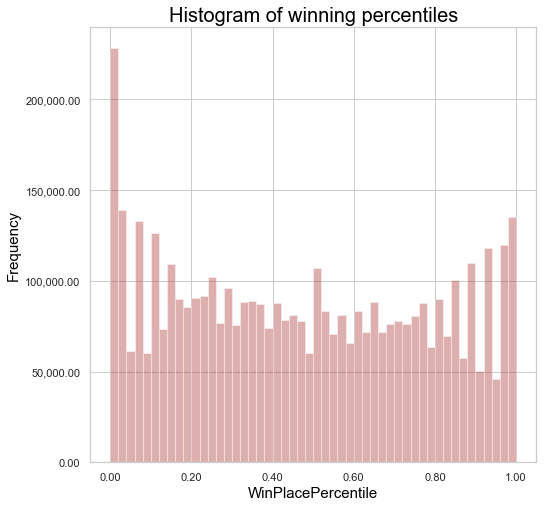

In [5]:
plot_hist(train.winPlacePerc, title='Histogram of winning percentiles', col = '#AA3939')

From the graph , we can see that our percentile distribution isn't exactly as uniform as we expected.There seems to be more cases occuring at low percentiles. This indicates that overall, we have more losers than winners.

The higher counts at the percentile extremes is to be expected. There is always some someone getting the percentiles scores of zero and 1, the rest of the scores varying across different matches.

Let's consider the average winning percentile per match and look at the distribution. As mentioned earlier, we should expect a normal distirbution with mean 0.5

In [6]:
train = train.assign(match_mean=train.groupby('matchId').winPlacePerc.transform('mean'))
train = train.assign(match_median = train.groupby('matchId').winPlacePerc.transform('median'))

We expect that these values should resemble a normal distribution. But, what we find is that the mean distribution is somewhat right-tailed. 

We can infer that some games have lower average percentiles. The reason for this can be players leaving the game before it finishes. This leads to more people and teams having lower ranks 

In [7]:
train.drop(['match_mean','match_median'], axis=1)
# data.drop('match_median')
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'match_mean',
       'match_median'],
      dtype='object')

## Pearson correlation between variables

In [8]:
#Mean of all matches
train.groupby('matchId').mean()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,match_mean,match_median
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000a43bce5eec,0.357895,1.242105,142.523905,0.842105,0.178947,1.115789,48.0,1321.547368,0.947368,0.547368,19.781053,1346.0,28.0,28.0,0.000000,0.157895,92.631226,0.000000,3.761547,0.010526,0.021053,1253.503021,3.073684,1490.631579,0.459261,0.459261,0.44440
0000eb01ea6cdd,0.265306,1.071429,134.407449,0.908163,0.265306,1.122449,49.5,0.000000,0.969388,0.632653,16.598020,1363.0,28.0,27.0,1484.714286,0.214286,81.256799,0.000000,5.538724,0.000000,0.000000,1082.208704,3.448980,0.000000,0.466364,0.466364,0.46295
0002912fe5ed71,0.031579,1.252632,112.595789,0.000000,0.263158,1.389474,48.0,0.000000,0.894737,0.463158,30.028463,1949.0,95.0,92.0,1510.631579,0.000000,1564.827368,0.021053,10.081642,0.021053,0.031579,1218.072305,4.031579,0.000000,0.489024,0.489024,0.48940
0003b92987589e,0.220000,0.790000,112.365500,0.590000,0.210000,0.820000,50.5,0.000000,0.950000,0.610000,22.461675,1410.0,50.0,47.0,1508.470000,0.110000,87.221000,0.000000,13.279286,0.010000,0.000000,973.116800,3.230000,0.000000,0.476326,0.476326,0.50000
0006eb8c17708d,0.236559,1.118280,134.813796,0.580645,0.215054,1.494624,47.0,1224.139785,0.913978,0.559140,23.328387,1382.0,47.0,44.0,-1.000000,0.129032,223.770240,0.000000,6.172333,0.000000,0.000000,958.819140,3.387097,1509.225806,0.492520,0.492520,0.47830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd74b5150cb4,0.216495,0.886598,140.800928,0.907216,0.195876,1.195876,49.0,1341.226804,0.948454,0.556701,13.199381,1335.0,29.0,27.0,-1.000000,0.216495,32.948351,0.000000,5.425680,0.010309,0.000000,832.719856,3.216495,1515.680412,0.462447,0.462447,0.46430
fffe53015be300,0.030928,1.216495,119.394186,0.000000,0.226804,1.402062,49.0,0.000000,0.907216,0.463918,26.921505,1882.0,97.0,92.0,1505.597938,0.000000,668.110324,0.000000,5.238557,0.010309,0.000000,1287.287474,4.092784,0.000000,0.491302,0.491302,0.46880
fffe562611d981,0.234043,0.787234,120.448745,0.957447,0.265957,0.840426,47.5,1337.085106,0.936170,0.510638,15.630926,1204.0,26.0,23.0,-1.000000,0.255319,114.039362,0.000000,0.331755,0.000000,0.000000,823.668011,3.351064,1520.010638,0.457447,0.457447,0.44000


In [9]:
#Number of unique matches w.r.t to number of unique players
train['groupId'].value_counts()
len(train['groupId'].value_counts())
    
len(train['Id'].value_counts())

4446965

## PCA

In [10]:
y = train['winPlacePerc']
X = train.drop(['winPlacePerc','Id','matchId','groupId'],axis=1)

In [11]:
pca = PCA()
X['matchType'],_ = pd.factorize(X['matchType'])


In [12]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca.explained_variance_ratio_)  

[4.83922111e-01 2.80616200e-01 2.16238835e-01 1.10309681e-02
 4.88548388e-03 2.03255479e-03 5.36838908e-04 3.10483610e-04
 1.94594853e-04 1.71875780e-04 5.69238369e-05 1.06152360e-06
 7.48085372e-07 5.35437952e-07 2.38643571e-07 2.12737244e-07
 1.08678567e-07 7.75365406e-08 5.14278056e-08 3.58088384e-08
 3.42389775e-08 1.83767248e-08 5.30341550e-09 1.57844581e-09
 1.00842268e-09 4.53690713e-10 2.70724081e-11]


In [14]:
print(pca.singular_values_)  

[3.35508479e+06 2.55488959e+06 2.24275902e+06 5.06550305e+05
 3.37108388e+05 2.17438727e+05 1.11747485e+05 8.49835965e+04
 6.72792964e+04 6.32299893e+04 3.63883908e+04 4.96913268e+03
 4.17149136e+03 3.52915183e+03 2.35608327e+03 2.22452623e+03
 1.58996556e+03 1.34297824e+03 1.09374168e+03 9.12663922e+02
 8.92434108e+02 6.53807386e+02 3.51231609e+02 1.91615486e+02
 1.53157077e+02 1.02729627e+02 2.50945384e+01]


#FEATURE ENGINEERING

In [15]:
def set_categorical(data):


  #Convert to categorical and assign a numeric value for each unique value
  data.matchId = data.matchId.astype('category')
  data.matchId = data.matchId.cat.codes

  data.groupId = data.groupId.astype('category')
  data.groupId = data.groupId.cat.codes

set_categorical(train)

In [16]:
def group_features(data):
  #Find the total players in the match that record is in by groupby on matchId and then counting the rows
  data['totalPlayers'] = data.groupby('matchId')['matchId'].transform('count')+1
  #Same thing for calculating the teamSize of the person in the record by groupby on groupId
  data['teamSize'] = data.groupby('groupId')['groupId'].transform('count')

  #colsToNormalize = ['DBNOs','assists','boosts','damageDealt','headshotKills','heals','killStreaks','revives','roadKills','vehicleDestroys','weaponsAcquired','winPoints','killPlace','kills','killPoints','winPlace']


  #Create a normalized version of kills->killsNorm and damageDealtNorm to normalize the data for a match of 100 players. Since not all matches have exactly 100 players, we can't compare the
  #data from a match of 50 players to a match of 100 players.
  colsToNormalize = ['kills','damageDealt']

  for x in colsToNormalize:
    data[str(x+'Norm')] = data[x]/data['totalPlayers']*100
    
    
group_features(train)

In [17]:
def add_matchType(data):
  #Creating a new feature normMatchType consisting of solo, duo, squad or other values. Since the data contains discrepancies where a solo game has a team size of 2
  # or a squad game having team size >4, etc., we assign these the 'other' value while the normal team sizes 1 for solo, 2 for duo, <4 for squad and other for the rest.
  # Since the data also consists of data from custom games there are teamSize 10, 12, 94, etc. which are added in other value.

  solo = ['solo','solo-fpp','normal-solo-fpp','normal-solo']
  duo = ['duo','duo-fpp','normal-duo-fpp','normal-duo']
  squad = ['squad','squad-fpp','normal-squad-fpp','normal-squad']
  other = ['crashfpp','flaretpp','crashtpp','flarefpp']

  data['normMatchType'] = 'none'
  data.loc[data.eval("teamSize==1 & matchType in @solo & normMatchType=='none'"),'normMatchType'] = 'solo'
  data.loc[data.eval("teamSize<=2 & matchType in @duo & normMatchType=='none'"),'normMatchType'] = 'duo'
  data.loc[data.eval("teamSize<=4 & matchType in @squad & normMatchType=='none'"),'normMatchType'] = 'squad'
  data.loc[data.eval("teamSize>0 & normMatchType=='none'"),'normMatchType'] = 'other'
  
  
add_matchType(train)
    

In [18]:
def feature_engineering(data):
  #Sum over the total distance travelled by the player including swim, ride and walk
  data['totalDistance'] = data.rideDistance+data.walkDistance+data.swimDistance
  data.totalDistance.fillna(0,inplace=True)
  data.totalDistance.replace(np.inf, 0, inplace=True)

  data['maxPossibleKills'] = data.totalPlayers-data.teamSize
  data.maxPossibleKills.fillna(0,inplace=True)
  data.maxPossibleKills.replace(np.inf, 0, inplace=True)

  #Sum over all the items the player has used like boosts, heals, weapons, etc.
  data['itemsUsed'] = data.boosts + data.heals + data.weaponsAcquired
  data.itemsUsed.fillna(0,inplace=True)
  data.itemsUsed.replace(np.inf, 0, inplace=True)

  #Normalize the items used by the distance travelled to equate different sizes of matches
  data['itemsPerDistance'] = data.itemsUsed/data.totalDistance
  data.itemsPerDistance.fillna(0,inplace=True)
  data.itemsPerDistance.replace(np.inf, 0, inplace=True)

  #Normalize the kills performed by the distance travelled to equate different sizes of matches
  data['killsPerDistance'] = data.kills/data.totalDistance
  data.killsPerDistance.fillna(0,inplace=True)
  data.killsPerDistance.replace(np.inf, 0, inplace=True)

  #Normalize the damage dealt by the distance travelled to equate different sizes of matches
  data['damageDealtPerDistance'] = data.damageDealt / data.totalDistance
  data.damageDealtPerDistance.fillna(0,inplace=True)
  data.damageDealtPerDistance.replace(np.inf, 0, inplace=True)

  #The maximum kills a teammate of the player has performed
  data['maxTeamKills'] = data.groupby('groupId')['kills'].max()
  data.maxTeamKills.fillna(0,inplace=True)
  data.maxTeamKills.replace(np.inf, 0, inplace=True)

  #Total number of kills the team has performed in total
  data['totalTeamKills'] = data.groupby('groupId')['kills'].sum()
  data.totalTeamKills.fillna(0,inplace=True)
  data.totalTeamKills.replace(np.inf, 0, inplace=True)

  #Find the skill of a person by dividing number of headshots by number of kills. Killing with just one headshot proves skill of the person
  data['headshotKillRate'] = data.headshotKills/data.kills
  data.headshotKillRate.fillna(0,inplace=True)
  data.headshotKillRate.replace(np.inf, 0, inplace=True)

  #Find the total items the team has used combined
  data['itemsUsedPerTeam'] = data.groupby('groupId')['itemsUsed'].sum()
  data.itemsUsedPerTeam.fillna(0,inplace=True)
  data.itemsUsedPerTeam.replace(np.inf, 0, inplace=True)

  #Find the percentage of kills the players has performed based on maximum possible kills he can perform. This essentially normalizes the kills for different match sizes
  data['percKill'] = data.kills / data.maxPossibleKills
  data.percKill.fillna(0,inplace=True)
  data.percKill.replace(np.inf, 0, inplace=True)

  #Find the percentage of kills the team has performed based on maximum possible kills they can perform. This essentially normalizes the kills for different match sizes
  data['percTeamKills'] = data.totalTeamKills / data.maxPossibleKills
  data.percTeamKills.fillna(0,inplace=True)
  data.percTeamKills.replace(np.inf, 0, inplace=True)

  #Find the mean of killPlace for all players in the team. This essentially finds the overall performance of the whole team in general
  data['meanTeamKillPlace'] = data.groupby('groupId')['killPlace'].mean()
  data.meanTeamKillPlace.fillna(0,inplace=True)
  data.meanTeamKillPlace.replace(np.inf, 0, inplace=True)
  
  data.matchType = data.matchType.astype('category')
  data.matchType = data.matchType.cat.codes
  
  
feature_engineering(train)


In [19]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,match_mean,match_median,totalPlayers,teamSize,killsNorm,damageDealtNorm,normMatchType,totalDistance,maxPossibleKills,itemsUsed,itemsPerDistance,killsPerDistance,damageDealtPerDistance,maxTeamKills,totalTeamKills,headshotKillRate,itemsUsedPerTeam,percKill,percTeamKills,meanTeamKillPlace
0,7f96b2f878858a,613774,30085,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,15,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,0.468364,0.4444,97,4,0.000000,0.000000,squad,244.8000,93,1,0.004085,0.000000,0.000000,1.0,2.0,0.0,9.0,0.000000,0.021505,50.333333
1,eef90569b9d03c,827822,32751,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,15,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,0.456703,0.4000,92,4,0.000000,99.423913,squad,1445.0445,88,5,0.003460,0.000000,0.063299,1.0,1.0,0.0,3.0,0.000000,0.011364,40.000000
2,1eaf90ac73de72,843520,3143,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,2,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,0.456686,0.4184,99,2,0.000000,68.686869,duo,161.8000,97,2,0.012361,0.000000,0.420272,0.0,0.0,0.0,2.0,0.000000,0.000000,72.000000
3,4616d365dd2853,1340461,45260,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,15,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,0.495240,0.5000,92,1,0.000000,35.760870,squad,202.7000,91,3,0.014800,0.000000,0.162309,3.0,6.0,0.0,33.0,0.000000,0.065934,13.000000
4,315c96c26c9aac,1757848,20531,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,13,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,0.499140,0.5000,98,1,1.020408,102.040816,solo,49.7500,97,2,0.040201,0.020101,2.010050,1.0,1.0,0.0,5.0,0.010309,0.010309,54.500000


In [20]:
train.normMatchType = train.normMatchType.astype('category')
train.normMatchType = train.normMatchType.cat.codes


In [21]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [22]:
train = reduce_mem_usage(train)
y = train['winPlacePerc']
X = train.drop(['winPlacePerc','matchId','groupId','Id'],axis=1)
xz = train.drop(['matchId','groupId','Id'],axis=1)
X.shape[1]

27

In [24]:
X.to_csv('final.csv', index=False)
xz.to_csv('final.csv', index=False)
# _y = pd.DataFrame(y, columns=['winPlacePerc'])
_y.to_csv('final2.csv', index=False)